In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [31]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [32]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [33]:
df.shape

(70000, 13)

In [34]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [35]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# separate x and y

In [36]:
df = df.drop(['id'], axis=1)

In [37]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [38]:
x = df.iloc[:,:-1]

In [39]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [40]:
y = df.iloc[:,11]

In [41]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

# Feature Selection (Univariate Selection)

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [43]:
FIT_FEATURES = SelectKBest(score_func=f_classif)

In [44]:
FIT_FEATURES.fit(x,y)

SelectKBest()

In [45]:
SCORE_COL = pd.DataFrame(FIT_FEATURES.scores_, columns=['score value'])

In [46]:
SCORE_COL

,score value
0,4209.007957
1,4.603641
2,8.197397
3,2388.777887
4,208.339524
5,303.629011
6,3599.361137
7,562.772977
8,16.790541
9,3.761355


In [47]:
NAME_COL = pd.DataFrame(x.columns)

In [48]:
top_features = pd.concat([NAME_COL, SCORE_COL], axis=1)

In [49]:
top_features

,0,score value
0,age,4209.007957
1,gender,4.603641
2,height,8.197397
3,weight,2388.777887
4,ap_hi,208.339524
5,ap_lo,303.629011
6,cholesterol,3599.361137
7,gluc,562.772977
8,smoke,16.790541
9,alco,3.761355


In [50]:
top_features.nlargest(8, 'score value')

,0,score value
0,age,4209.007957
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494
8,smoke,16.790541


# Feature Importance

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
model = ExtraTreesClassifier()

In [53]:
model.fit(x,y)

ExtraTreesClassifier()

In [56]:
model.feature_importances_

array([0.2893963 , 0.00536551, 0.16990828, 0.17861819, 0.18094374,
       0.10710104, 0.04568874, 0.0110527 , 0.00390004, 0.00375073,
       0.00427474])

In [57]:
top = pd.Series(model.feature_importances_,index=x.columns)

In [58]:
top

age            0.289396
gender         0.005366
height         0.169908
weight         0.178618
ap_hi          0.180944
ap_lo          0.107101
cholesterol    0.045689
gluc           0.011053
smoke          0.003900
alco           0.003751
active         0.004275
dtype: float64

<AxesSubplot:>

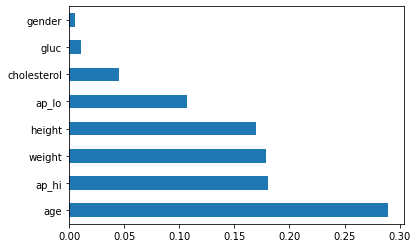

In [63]:
top.nlargest(8).plot(kind='barh')

In [64]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [65]:
x = x.drop(['smoke', 'alco', 'active'], axis=1)

In [66]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
0,18393,2,168,62.0,110,80,1,1
1,20228,1,156,85.0,140,90,3,1
2,18857,1,165,64.0,130,70,3,1
3,17623,2,169,82.0,150,100,1,1
4,17474,1,156,56.0,100,60,1,1
...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1
69996,22601,1,158,126.0,140,90,2,2
69997,19066,2,183,105.0,180,90,3,1
69998,22431,1,163,72.0,135,80,1,2


# Split train and test

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=1)

In [69]:
xtest

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc
6670,16099,1,153,93.0,140,90,1,1
49567,14437,1,157,89.0,120,80,1,1
50796,19839,1,165,66.0,150,90,1,1
22310,18050,2,176,88.0,160,100,2,2
54037,16819,2,165,78.0,140,90,1,1
...,...,...,...,...,...,...,...,...
15691,18263,1,170,70.0,120,80,1,1
25200,21081,1,165,60.0,120,70,3,1
7366,14716,1,170,68.0,100,60,1,1
56399,21998,1,165,66.0,110,80,1,1


# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
Rclf = RandomForestClassifier()

In [72]:
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [73]:
Rclf.score(xtest,ytest)

0.7102380952380952

# Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
Dclf = DecisionTreeClassifier()

In [76]:
Dclf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [77]:
Dclf.score(xtest,ytest)

0.6335714285714286